In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [3]:
dataset_path = r"C:\Users\jsnal\OneDrive - Bina Nusantara\Semester 3\Deep Learning\Project Helmet Detection\dataset\images"

processed_path = r"C:\Users\jsnal\OneDrive - Bina Nusantara\Semester 3\Deep Learning\Project Helmet Detection\dataset\processed_images"

if not os.path.exists(processed_path):
    os.makedirs(processed_path)
    print(f"Created folder: {processed_path}")

In [4]:
image_files = [f for f in os.listdir(dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
print(f"Total images found: {len(image_files)}")

Total images found: 764


In [5]:
def preprocess_and_save(img_path, save_path, target_size=(224, 224), grayscale=False):

    # Load and resize image
    img = load_img(img_path, color_mode='grayscale' if grayscale else 'rgb', target_size=target_size)
    
    # Convert to array and normalize
    img_array = img_to_array(img) / 255.0

    # Convert float array to uint8 for saving
    img_save = (img_array * 255).astype(np.uint8)

    # Save using cv2
    cv2.imwrite(save_path, cv2.cvtColor(img_save, cv2.COLOR_RGB2BGR))
    return img_array

In [6]:
for img_name in image_files:
    img_path = os.path.join(dataset_path, img_name)
    save_path = os.path.join(processed_path, img_name)
    preprocess_and_save(img_path, save_path, target_size=(224, 224), grayscale=False)

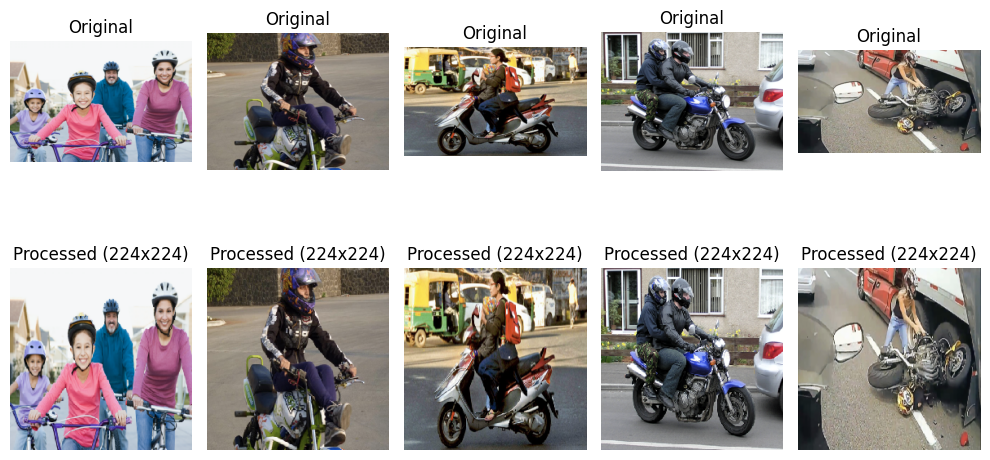

In [7]:
sample_images = image_files[:5]
plt.figure(figsize=(10, 6))

for i, img_name in enumerate(sample_images):
    orig_path = os.path.join(dataset_path, img_name)
    proc_path = os.path.join(processed_path, img_name)

    # Read both original and processed
    original = cv2.cvtColor(cv2.imread(orig_path), cv2.COLOR_BGR2RGB)
    processed = cv2.cvtColor(cv2.imread(proc_path), cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, len(sample_images), i + 1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis("off")
    
    plt.subplot(2, len(sample_images), len(sample_images) + i + 1)
    plt.imshow(processed)
    plt.title("Processed (224x224)")
    plt.axis("off")

plt.tight_layout()
plt.show()